# ECBM E4040 Assignment 2 - Task 1: Optimization

In this task, we introduce multiple SGD-based optimization methods. As you have learned from the last assignment, SGD is an efficient method to update parameters. However, to make SGD perform well, we need to find an appropriate learning rate and a good initial value. Otherwise, the network will get stuck if learning rate is small, or it will diverge if the learning rate is too large. In reality, since we have no prior knowledge about the training data, it is not trivial to find a good learning rate manually. Also, when the network becomes deeper, for each layer we may need to set a different learning rate, and that will again increase the development workload. Obviously, this is not a good direction. 

Another common problem is the lack of sufficient training data. This can make our training get stuck when using the naive SGD method. 

So, **how to set a good learning rate?** You are going to experiment with **SGD with momentum**, **RMSProp**, **Adam** and make comparisons.

All of these optimizers are adaptive learning rate methods. Here is a useful link: http://ruder.io/optimizing-gradient-descent/.

In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from ecbm4040.cifar_utils import load_data

## Load CIFAR 10

Here we use a small dataset with only 2500 samples to simulate "lack-of-data" situation.

In [2]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_val = X_train[:500,:]
y_val = y_train[:500]
X_train = X_train[500:2500,:]
y_train = y_train[500:2500]

mean_image = np.mean(X_train, axis=0).astype(np.float32)
X_train = X_train.astype(np.float32) - mean_image
X_val = X_val.astype(np.float32) - mean_image

# We've vectorized the data for you. That is, we flatten the 32×32×3 images into 1×3072 Numpy arrays.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

Start downloading data...
Download complete.
Training data shape:  (2000, 3072)
Training labels shape:  (2000,)
Validation data shape:  (500, 3072)
Validation labels shape:  (500,)


## Part 1: Implement Optimizers

Here we provide an MLP code snippet for testing.

In [4]:
from ecbm4040.neuralnets.mlp import MLP

### Original SGD (for comparison purpose only)

In [5]:
from ecbm4040.optimizers import SGDOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, weight_scale=1e-3, l2_reg=0.0)
optimizer = SGDOptim()
hist_sgd = optimizer.train(model, X_train, y_train, X_val, y_val, 
                           num_epoch=30, batch_size=200, learning_rate=1e-2, learning_decay=0.95, 
                           verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.138, new learning rate = 0.0095
epoch 2: valid acc = 0.138, new learning rate = 0.009025
epoch 3: valid acc = 0.138, new learning rate = 0.00857375
epoch 4: valid acc = 0.138, new learning rate = 0.0081450625
epoch 5: valid acc = 0.144, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.144, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.144, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.148, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.158, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.16, new learning rate = 0.005987369392383786
epoch 11: valid acc = 0.158, new learning rate = 0.005688000922764597
epoch 12: valid acc = 0.174, new learning rate = 0.005403600876626367
epoch 13: valid acc = 0.17, new learning rate = 0.005133420832795048
epoch 14: valid acc = 0.18, new learning rate = 0.0048767497911552955
epoch 15: valid acc = 0.178, new learnin

### SGD + Momentum

<span style="color:red">__TODO:__</span> Edit **SGDmomentumOptim** in __./ecbm4040/optimizers.py__

In [15]:
from ecbm4040.optimizers import SGDmomentumOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = SGDmomentumOptim(model, momentum=0.8)
hist_sgd_momentum = optimizer.train(model, X_train, y_train, X_val, y_val, 
                                         num_epoch=30, batch_size=200, learning_rate=1e-2, 
                                         learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.14, new learning rate = 0.0095
epoch 2: valid acc = 0.148, new learning rate = 0.009025
epoch 3: valid acc = 0.178, new learning rate = 0.00857375
epoch 4: valid acc = 0.168, new learning rate = 0.0081450625
epoch 5: valid acc = 0.174, new learning rate = 0.007737809374999999
epoch 6: valid acc = 0.182, new learning rate = 0.007350918906249998
epoch 7: valid acc = 0.19, new learning rate = 0.006983372960937498
epoch 8: valid acc = 0.186, new learning rate = 0.006634204312890623
epoch 9: valid acc = 0.174, new learning rate = 0.006302494097246091
epoch 10: valid acc = 0.184, new learning rate = 0.005987369392383786
epoch 11: valid acc = 0.186, new learning rate = 0.005688000922764597
epoch 12: valid acc = 0.182, new learning rate = 0.005403600876626367
epoch 13: valid acc = 0.184, new learning rate = 0.005133420832795048
epoch 14: valid acc = 0.19, new learning rate = 0.0048767497911552955
epoch 15: valid acc = 0.186, new learnin

### RMSprop

<span style="color:red">__TODO:__</span> Edit **RMSpropOptim** in **./ecbm4040/optimizers.py**

In [35]:
from ecbm4040.optimizers import RMSpropOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = RMSpropOptim(model)
hist_rmsprop = optimizer.train(model, X_train, y_train, X_val, y_val, 
                               num_epoch=30, batch_size=200, learning_rate=1e-3, 
                               learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.122, new learning rate = 0.00095
epoch 2: valid acc = 0.104, new learning rate = 0.0009025
epoch 3: valid acc = 0.104, new learning rate = 0.000857375
epoch 4: valid acc = 0.104, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.098, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.126, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.182, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.166, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.16, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.174, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.176, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.154, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.146, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.174, new learning rate = 0.00048767497911552944
epoch 15: valid a

### Adam

<span style="color:red">__TODO:__</span> Edit **AdamOptim** in **./ecbm4040/optimizers.py**

In [43]:
from ecbm4040.optimizers import AdamOptim

model = MLP(input_dim=3072, hidden_dims=[100, 100], num_classes=10, l2_reg=0.0, weight_scale=1e-3)
optimizer = AdamOptim(model)
hist_adam = optimizer.train(model, X_train, y_train, X_val, y_val, 
                            num_epoch=30, batch_size=200, learning_rate=1e-3, 
                            learning_decay=0.95, verbose=False, record_interval=1)

number of batches for training: 10
epoch 1: valid acc = 0.146, new learning rate = 0.00095
epoch 2: valid acc = 0.178, new learning rate = 0.0009025
epoch 3: valid acc = 0.174, new learning rate = 0.000857375
epoch 4: valid acc = 0.188, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.258, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.234, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.264, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.258, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.27, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.276, new learning rate = 0.0005987369392383785
epoch 11: valid acc = 0.288, new learning rate = 0.0005688000922764595
epoch 12: valid acc = 0.306, new learning rate = 0.0005403600876626365
epoch 13: valid acc = 0.314, new learning rate = 0.0005133420832795047
epoch 14: valid acc = 0.33, new learning rate = 0.00048767497911552944
epoch 15: valid ac

## Part 2: Comparison

<span style="color:red">__TODO:__</span> Run the following cells, which plot the loss curves of different optimizers. 

In [44]:
loss_hist_sgd, train_acc_hist_sgd, val_acc_hist_sgd = hist_sgd
loss_hist_momentum, train_acc_hist_momentum, val_acc_hist_momentum = hist_sgd_momentum
loss_hist_rmsprop, train_acc_hist_rmsprop, val_acc_hist_rmsprop = hist_rmsprop
loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = hist_adam

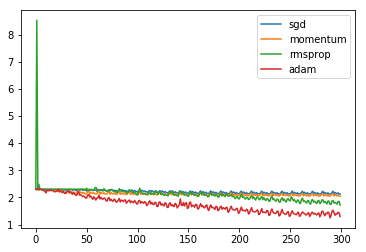

In [45]:
# Plot training error curve of optimizers
plt.plot(loss_hist_sgd, label="sgd")
plt.plot(loss_hist_momentum, label="momentum")
plt.plot(loss_hist_rmsprop, label="rmsprop")
plt.plot(loss_hist_adam, label="adam")
plt.legend()
plt.show()

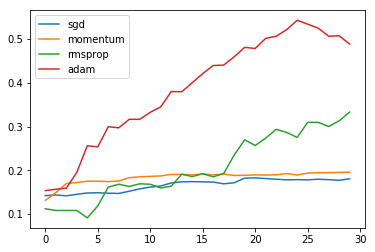

In [46]:
# Plot training accuracy curve of optimizers
plt.plot(train_acc_hist_sgd, label="sgd")
plt.plot(train_acc_hist_momentum, label="momentum")
plt.plot(train_acc_hist_rmsprop, label="rmsprop")
plt.plot(train_acc_hist_adam, label="adam")
plt.legend()
plt.show()

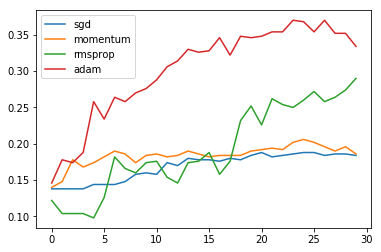

In [47]:
# Plot validation accuracy curve of optimizers
plt.plot(val_acc_hist_sgd, label="sgd")
plt.plot(val_acc_hist_momentum, label="momentum")
plt.plot(val_acc_hist_rmsprop, label="rmsprop")
plt.plot(val_acc_hist_adam, label="adam")
plt.legend()
plt.show()

<span style="color:red">__TODO:__</span> Describe your results, and discuss your understandings of these optimizers, such as their advantages/disadvantages and when to use them.

Answer: 
Momentum: Momentum improves upon SGD by increasing the model's "movement" in the direction of the steepest descent in the cost function, but reducing movement in directions which do not have many successive gradients in the same direction. It handles the ravine problem which can occur around local minimas causing the model's loss to oscilate up and down the walls.

Adam: Automatically adapts learning rates for each parameter during training. Because the second-order moment estimation in RMSprop might have high bias early on in training Adam fixes this by correcting for their initilization at the origin.

RMSprop: Uses an exponentially weighted moving average to shrink learning rate and forgets history from the extreme past to increase convergence rate 

Results:All 4 optimizers follow the same general pattern for training error, but rmseprop and Adam (to a larger extent) drop the furthest. This could be due to the fact that using different learning rates for different parameters is generally a good idea, and Adam dropped off the furthest because it corrects for bias in its first and second moment estimation which RMSprop does not. Given more runs RMSprop might get to the same loss because the estimation bias occurs early on in training.

The curves of accuracies show that rmsprop and Adam learn the best/fastest. These curves might be different depending on the hyperparameters used, but Adam is considered to be farily robust and should continue to perform at the same level. We can see the problems with RMSprop and its biased estimation early on since Adam outperforms it very quickly, but they do look to be converging during later runs.
